In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import sys
import cv2

In [2]:
w_dir = os.getcwd()+"/data/data"

In [3]:
w_dir

'/media/Drivef/Study/Mtech 2nd Sem/Vision/ass2/VLAD_kmeans/data/data'

In [4]:
bnames = []
fine_labels = []
broad_labels = []
images = []
broad_counter = 0
for folder in os.listdir(w_dir):
    path = w_dir+"/"+folder
    fine_counter = 0
    for folder2 in os.listdir(path):
        imgs_path = path +"/"+folder2
        for img_path in os.listdir(imgs_path):
            read_img = cv2.imread(imgs_path +"/"+img_path)
            img = (cv2.cvtColor(read_img, cv2.COLOR_BGR2RGB))
            img = cv2.resize(img, (300,300))
            bnames.append(folder)
            images.append(img)
            broad_labels.append(broad_counter)
            fine_labels.append(fine_counter)
        fine_counter+=1
    broad_counter+=1

In [5]:
# chunk_size = 80
# c_i = 0
# for i in range(len(images)//chunk_size + 1):
#     init = c_i*chunk_size
#     img_i = images[init:min(init+chunk_size, len(images))]
#     np.save("batches/imgs_"+str(i)+".npy", img_i)
#     c_i+=1



In [6]:
np.save("images.npy", images)

In [7]:
np.save("bnames.npy", bnames)

In [8]:
np.save("broad_labels.npy", broad_labels)

In [9]:
np.save("fine_labels.npy", fine_labels)

In [10]:
len(images), len(fine_labels), len(broad_labels), len(bnames)

(2423, 2423, 2423, 2423)

In [5]:
broad_labels = np.load("broad_labels.npy")
fine_labels = np.load("fine_labels.npy")
images = np.load("images.npy")

In [7]:
len(images), len(fine_labels), len(broad_labels)

(2423, 2423, 2423)

In [8]:
net = 0
for i in np.unique(broad_labels):
    print(i)
    l = np.unique(fine_labels[broad_labels == i]).shape[0]
    net+=l
print(net)

0
1
2
3
4
36


In [9]:
combined_labels = []

counter = 0
prevbl = 0
prevfl = 0

currbl = 0
currfl = 0
for i in range(len(broad_labels)):
    
    currbl = broad_labels[i]
    currfl = fine_labels[i]
    
    if(currbl != prevbl):
        counter += 1
    elif(currfl != prevfl):
        counter += 1
    else:
        pass
    
    prevbl = currbl
    prevfl = currfl
    
    combined_labels.append(counter)

In [10]:
len(broad_labels), len(fine_labels), len(combined_labels)

(2423, 2423, 2423)

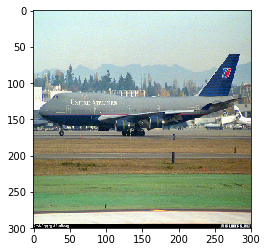

In [11]:
np.unique(combined_labels, return_counts = True), len(np.unique(combined_labels))
np.save("combined_labels.npy", combined_labels)
plt.imshow(images[0])
plt.show()

In [12]:
combined_labels = []

counter = 0
prevbl = 0
prevfl = 0

currbl = 0
currfl = 0
for i in range(len(broad_labels)):
    
    currbl = broad_labels[i]
    currfl = fine_labels[i]
    
    if(currbl != prevbl):
        counter += 1
    elif(currfl != prevfl):
        counter += 1
    else:
        pass
    
    prevbl = currbl
    prevfl = currfl
    
    combined_labels.append(counter)

In [13]:
len(broad_labels), len(fine_labels), len(combined_labels)

(2423, 2423, 2423)

In [14]:
np.unique(combined_labels, return_counts = True), len(np.unique(combined_labels))

((array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35]),
  array([266,  67,  67,  67,  67,  66,  67,  23,  25,  26,  12,  18,  15,
          14,  25,  17,  18,  20,  46,  45,  42,  45,  46,  45,  45,  46,
         100, 102, 100, 168, 108,  80,  84, 221, 122,  98])),
 36)

In [15]:
np.save("combined_labels.npy", combined_labels)

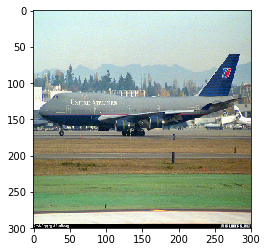

In [16]:
plt.imshow(images[0])
plt.show()